<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/%EC%9E%A5%EB%A5%B4%2C_%EB%B0%B0%EA%B8%89%EC%82%AC_%EC%A0%84%EC%B2%98%EB%A6%AC(%EB%AF%B8%EC%88%98)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 장르별 영화 관객수 평균값으로 랭크 인코딩

In [557]:
#기본 모듈 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

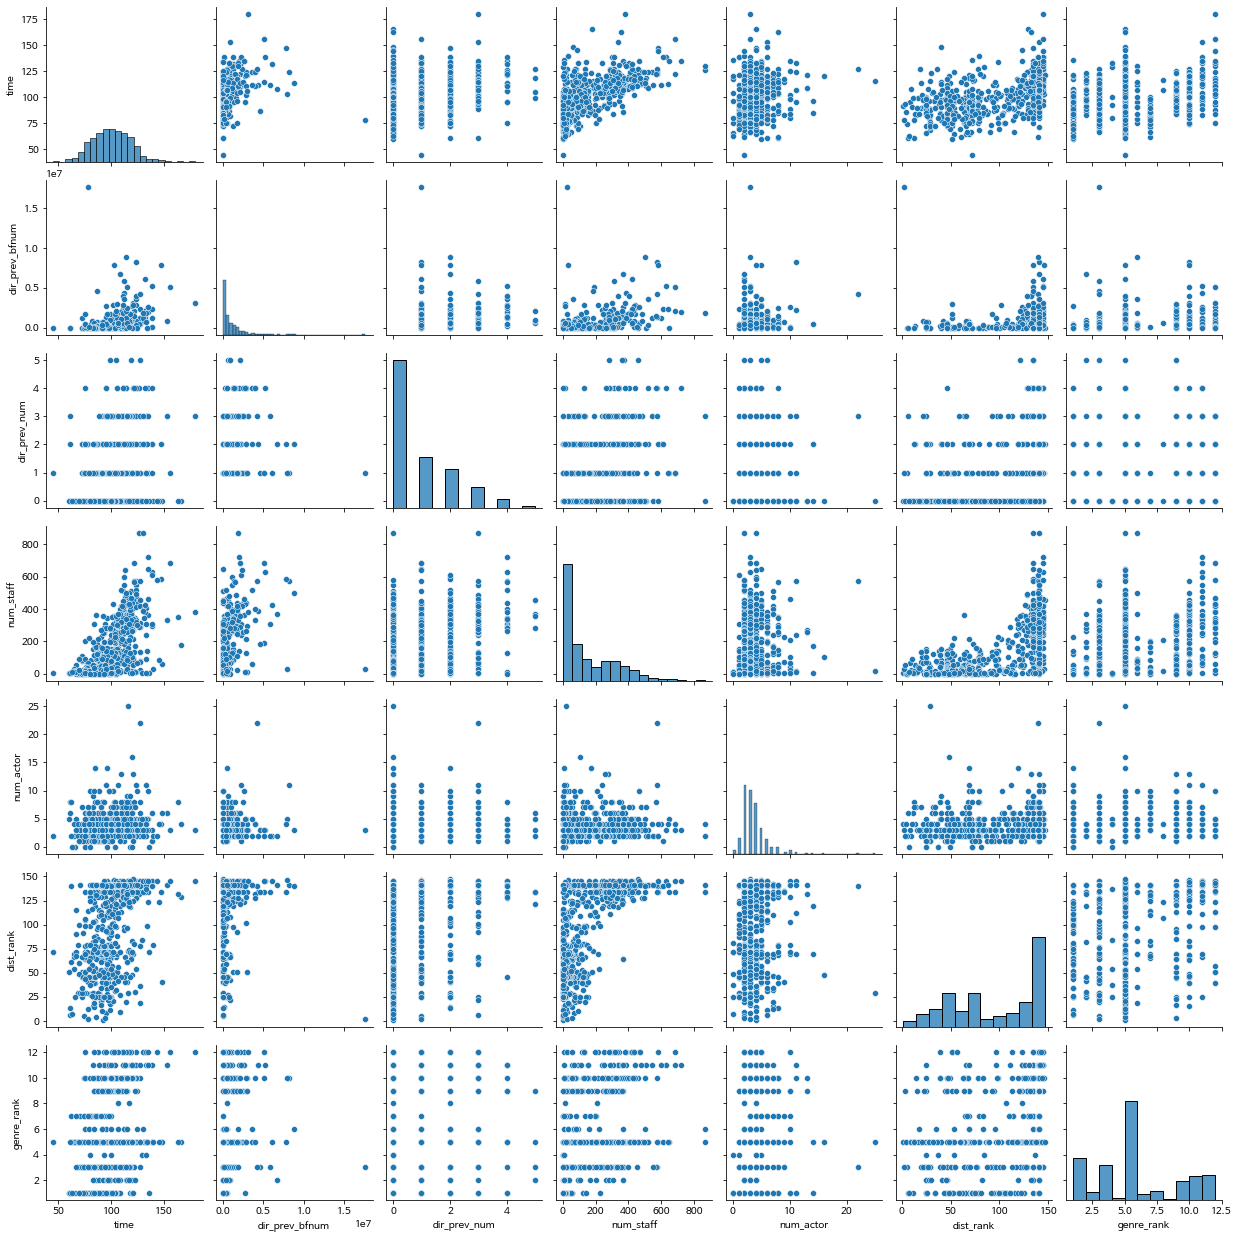

In [558]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train)
plt.show()
#dir_prev_bfnum, dir_prev_num, num_staff, num_actor, box_off_num 

In [559]:
#데이터 불러오기
train = pd.read_csv("/content/movies_train.csv")
test = pd.read_csv('/content/movies_test.csv')
submission = pd.read_csv('/content/submission.csv')

In [560]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


In [513]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [514]:
test.shape

(243, 11)

In [561]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font',family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [516]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [517]:
test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7


In [518]:
train.shape

(600, 12)

# **1번 distributor 전처리**

In [562]:
#distributor 열에서 (주) -> 주를 삭제,()만 남음 
train['distributor'] = train.distributor.str.replace("(주)", '') 
test['distributor'] = test.distributor.str.replace("(주)", '')

In [563]:
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor] # 0부터 9까지 a부터 z까지 A부터 Z까지 가부터 힣까지 모든 문자열을 삭제해줌
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [521]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [522]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

In [523]:
test.shape

(243, 11)

In [524]:
#distributor 종류 너무 많아서 get_dis 함수로 이름 통일된 것 확인
find = train[train['distributor'].str.contains('CGV')]
print(find)

Empty DataFrame
Columns: [title, distributor, genre, release_time, time, screening_rat, director, dir_prev_bfnum, dir_prev_num, num_staff, num_actor, box_off_num]
Index: []


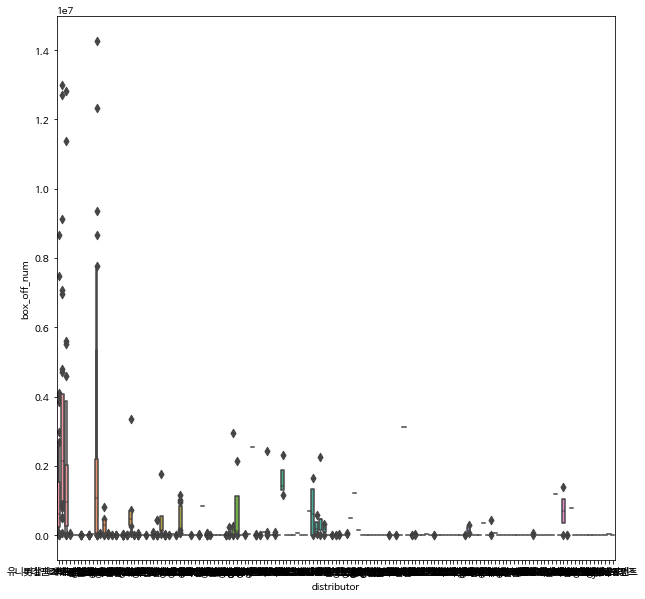

In [525]:
#배급사 별 관객수의 박스플랏 -> 이상치 존재 -> 중앙값으로 처리
plt.rcParams['figure.figsize'] = [10,10] 
sns.boxenplot(x='distributor', y='box_off_num', data=train)

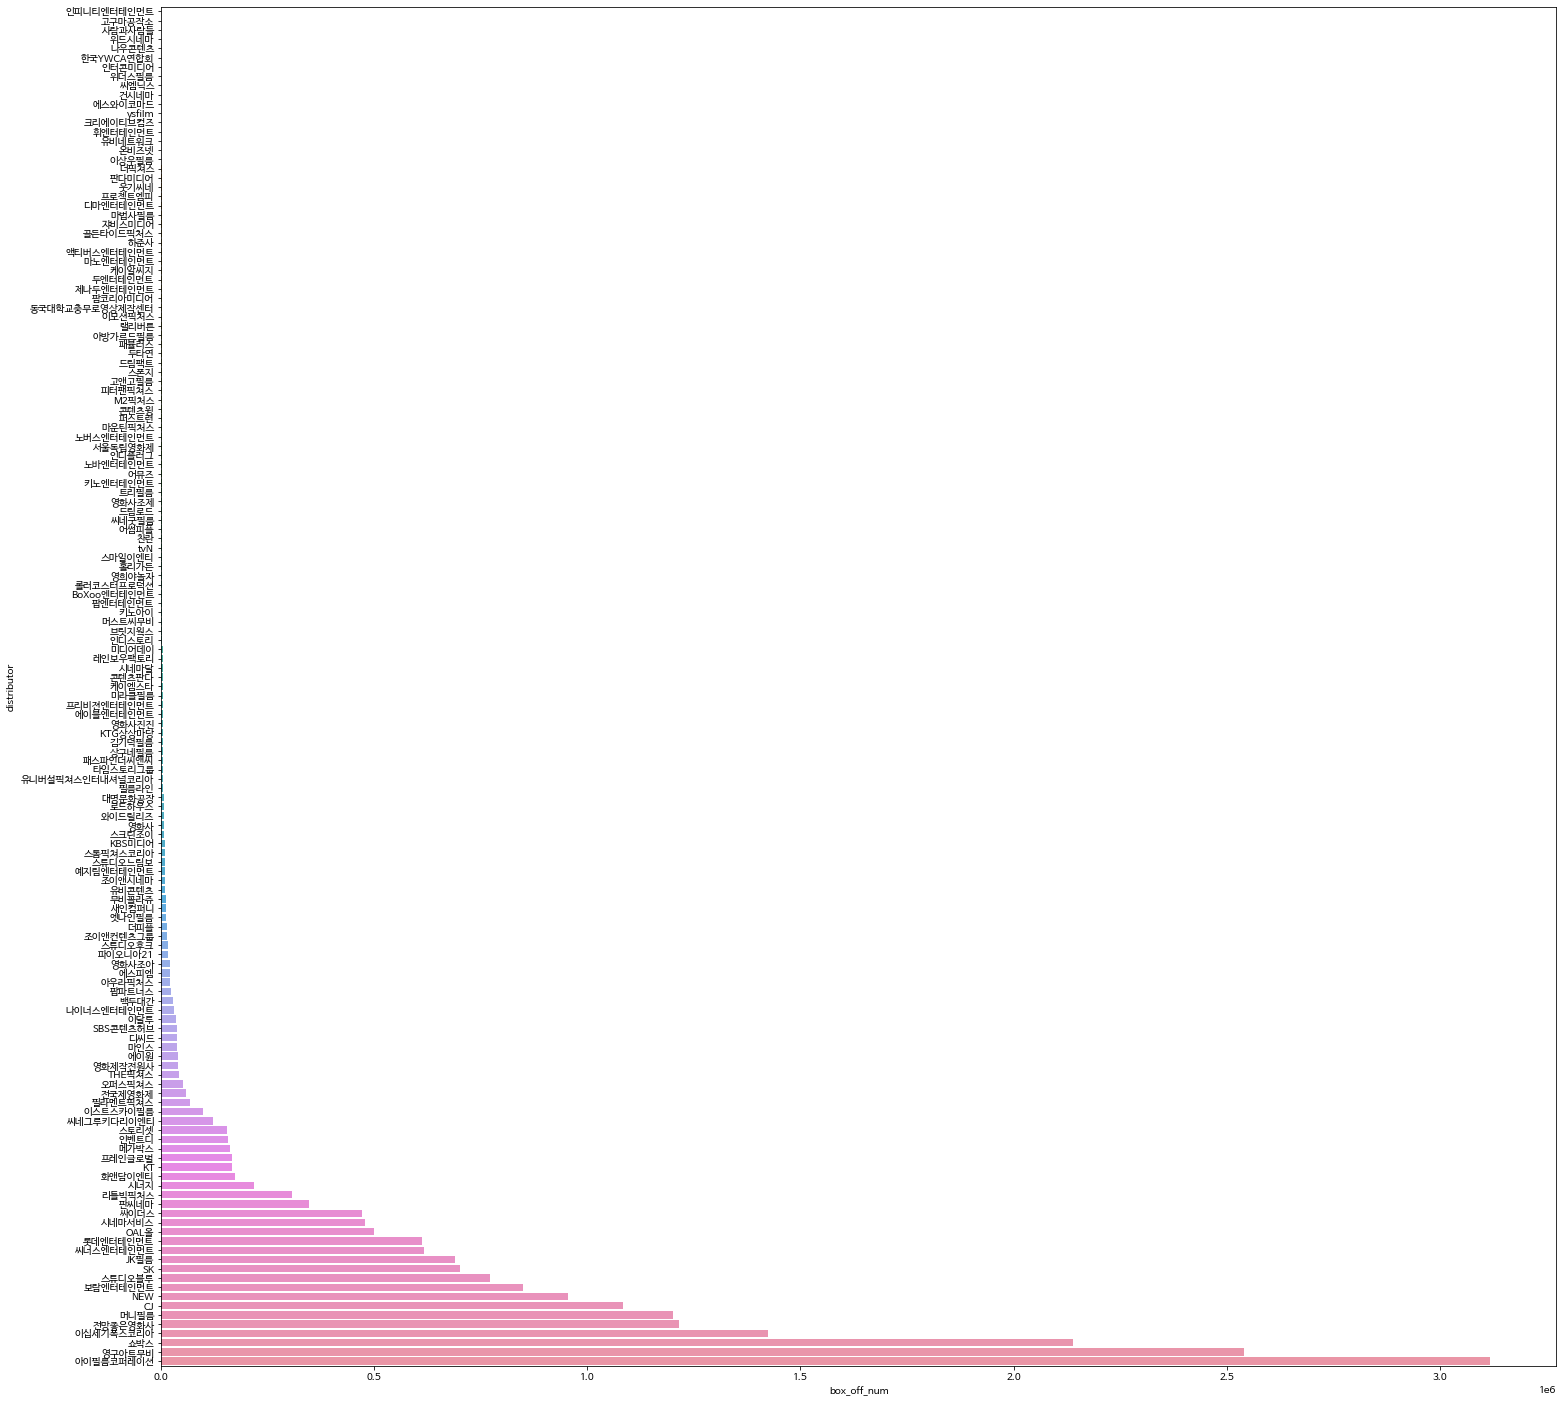

In [526]:
#배급사별 관객수 중앙값으로 처리 *로그변환 X
df1_1=pd.DataFrame(train.groupby('distributor').box_off_num.median().sort_values(ascending=True))
df1_1=df1_1.reset_index()
plt.rcParams['figure.figsize'] = [25,25] 
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='distributor',data = df1_1)
#skewed 확인

In [527]:
df1_1

,distributor,box_off_num
0,인피니티엔터테인먼트,2.0
1,고구마공작소,8.0
2,사람과사람들,42.0
3,위드시네마,46.0
4,나우콘텐츠,54.0
...,...,...
142,전망좋은영화사,1214237.0
143,이십세기폭스코리아,1422844.0
144,쇼박스,2138560.0
145,영구아트무비,2541603.0


In [528]:
df1_1 = df1_1.reset_index()
df1_1['dist_rank']=df1_1['index']+1
df1_1 = df1_1.drop('index', axis = 1)
df1_1 = df1_1.drop('box_off_num', axis = 1)

In [529]:
df1_1

,distributor,dist_rank
0,인피니티엔터테인먼트,1
1,고구마공작소,2
2,사람과사람들,3
3,위드시네마,4
4,나우콘텐츠,5
...,...,...
142,전망좋은영화사,143
143,이십세기폭스코리아,144
144,쇼박스,145
145,영구아트무비,146


In [530]:
df1_1_OUTER_JOIN = pd.merge(train,df1_1, left_on='distributor', right_on='distributor', how='outer')
train = pd.DataFrame(df1_1_OUTER_JOIN)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dist_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,134
1,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,134
2,관능의 법칙,롯데엔터테인먼트,드라마,2014-02-13,108,청소년 관람불가,권칠인,75740.0,1,288,3,781516,134
3,끝과 시작,롯데엔터테인먼트,멜로/로맨스,2013-04-04,87,청소년 관람불가,민규동,4598985.0,1,182,3,38809,134
4,친구 2,롯데엔터테인먼트,느와르,2013-11-14,124,청소년 관람불가,곽경택,372863.0,2,319,3,2971475,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,네모난원,영화사,드라마,2012-12-06,100,15세 관람가,김성훈,86837.0,2,10,3,7173,89
596,사랑을 말하다,크리에이티브컴즈,드라마,2012-09-13,61,15세 관람가,전화성,424.0,2,6,8,188,13
597,분홍돌고래,ysfilm,드라마,2010-07-01,78,12세 관람가,조연수,NaN,0,17,7,172,12
598,"메밀꽃, 운수 좋은 날, 그리고 봄봄",이달투,애니메이션,2014-08-21,90,전체 관람가,안재훈,53235.0,1,167,7,35567,110


In [531]:
test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7


In [532]:
df1_1

,distributor,dist_rank
0,인피니티엔터테인먼트,1
1,고구마공작소,2
2,사람과사람들,3
3,위드시네마,4
4,나우콘텐츠,5
...,...,...
142,전망좋은영화사,143
143,이십세기폭스코리아,144
144,쇼박스,145
145,영구아트무비,146


In [533]:
df1_1.columns

Index(['distributor', 'dist_rank'], dtype='object')

In [534]:
#test data에는 box_off_num이 없음 -> 그냥 train data의 dist_rank를 test data에 새로운 열 dist_rank 추가함.
join=pd.merge(test,df1_1,left_on='distributor', right_on='distributor', how='left') #df1_1에 없는 값을 다 NaN처리함.
test = pd.DataFrame(join)
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,dist_rank
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,132.0
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,145.0
2,하모니,CJ,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,141.0
3,의형제,쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,145.0
4,평행 이론,CJ,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4,112.0
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,69.0
240,어떤살인,컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,마운틴픽처스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7,46.0


In [535]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dist_rank          31
dtype: int64

In [536]:
#train 데이터 기준으로 만들어진 rank라서 train에 없는 test의 distributor는 NaN값으로 뜸, 여기서 이것을 순위가 제일 안좋은 0으로 처리할지?
test['dist_rank'] = test['dist_rank'].fillna(0)
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dist_rank           0
dtype: int64

-로그 변환된 건 안넣어도 됨, 로그변환 전의 값을 인코딩해서 rank를 부여하나 로그 변환 후의 값을 인코딩해서 rank를 부여하나 결과 값은 같음. 아래에 증거...


---


여기서부터 

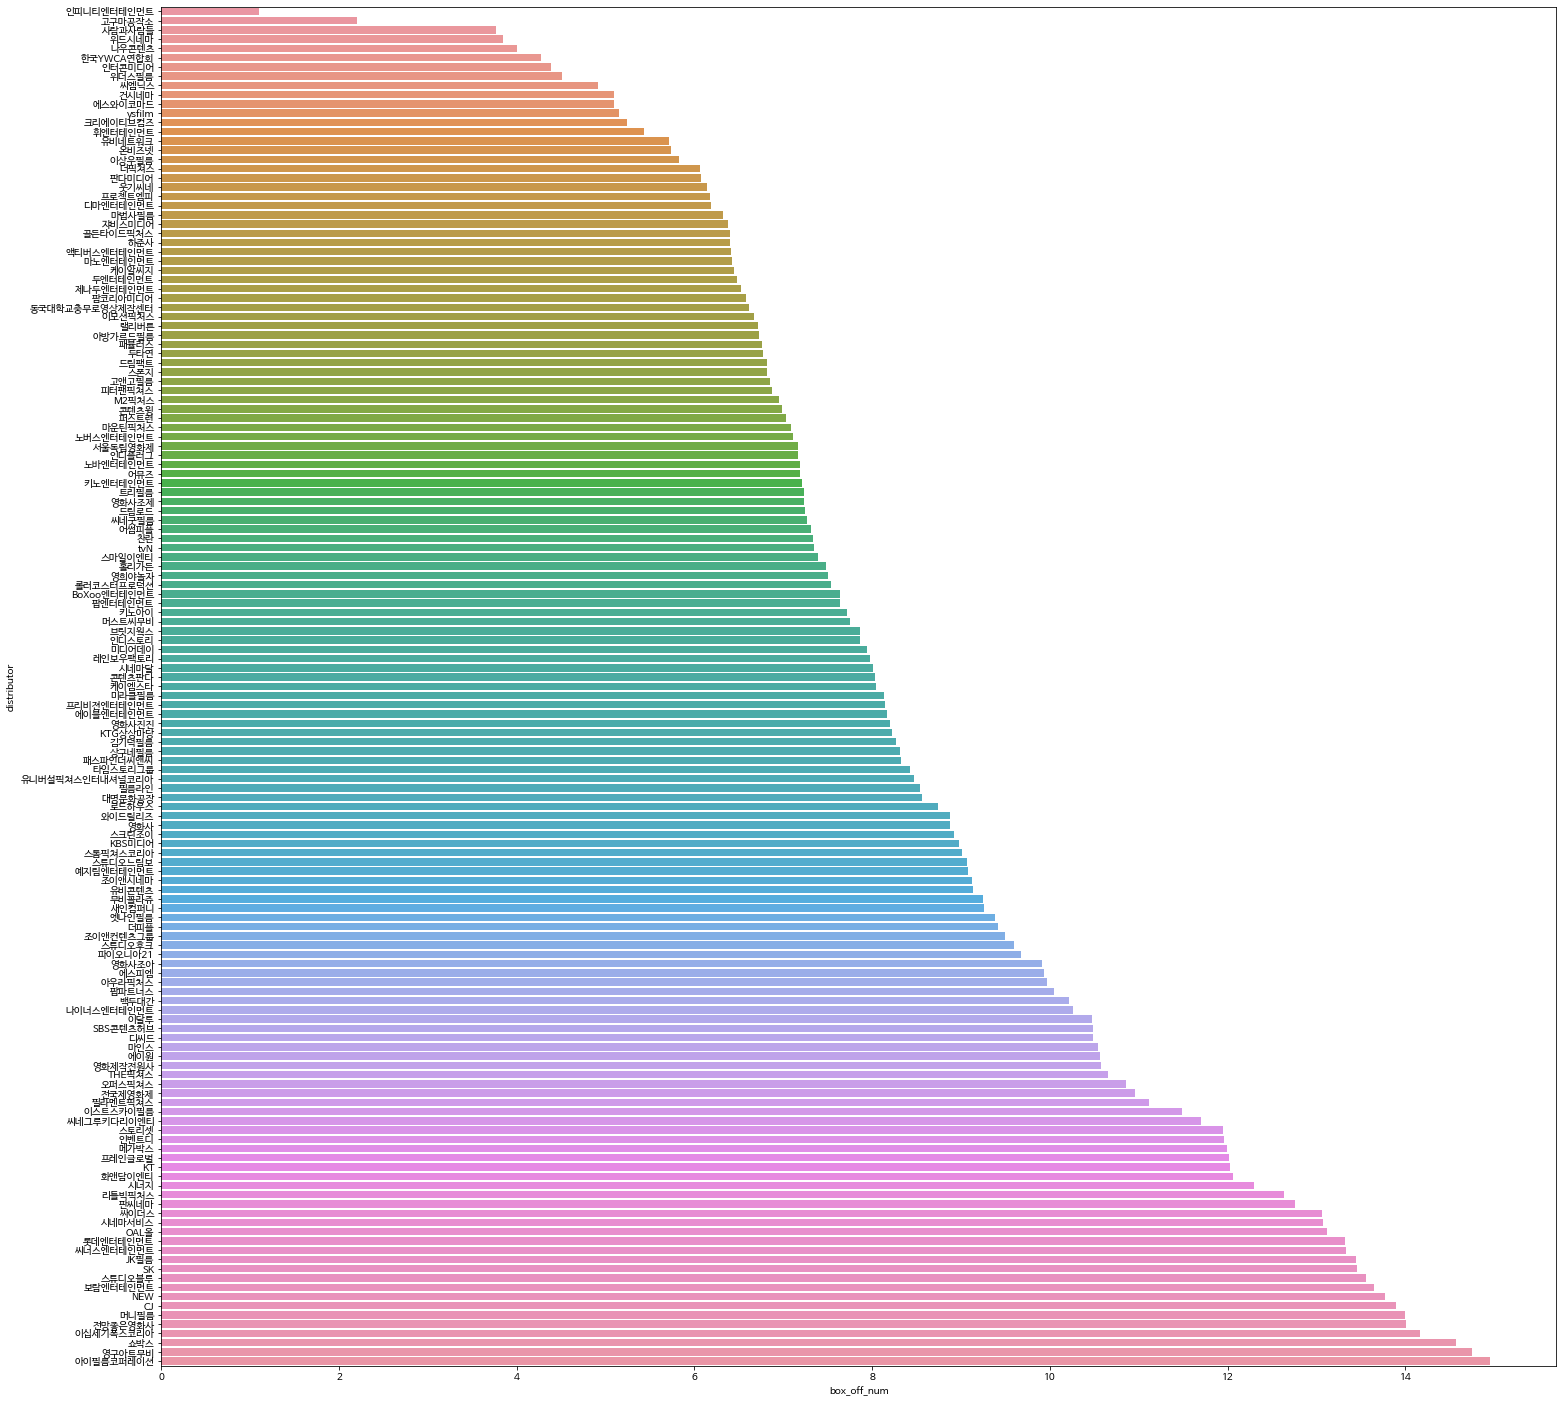

In [537]:
#배급사별 관객수 중앙값으로 처리 *로그변환 O
df1_2=pd.DataFrame(train.groupby('distributor').box_off_num.median().sort_values(ascending=True))
df1_2=df1_2.reset_index()

df1_2["box_off_num"]=np.log1p(df1_2["box_off_num"])
plt.rcParams['figure.figsize'] = [25,25] 
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='distributor',data = df1_2)

동일 여부 확인

In [538]:
df1_2=df1_2.reset_index()

In [539]:
df1_2=df1_2.drop('distributor', axis = 1)
df1_2=df1_2.drop('box_off_num', axis = 1)

In [540]:
df1_2

,index
0,0
1,1
2,2
3,3
4,4
...,...
142,142
143,143
144,144
145,145


In [541]:
df1_1_check=pd.DataFrame(train.groupby('distributor').box_off_num.median().sort_values(ascending=False))
df1_1_check=df1_1_check.reset_index()
df1_1_check=df1_1_check.reset_index()

df1_1_check=df1_1_check.drop('distributor', axis = 1)
df1_1_check=df1_1_check.drop('box_off_num', axis = 1)

df1_1_check

,index
0,0
1,1
2,2
3,3
4,4
...,...
142,142
143,143
144,144
145,145


In [542]:
#동일 여부 확인
df1_2.equals(df1_1_check)
##동일함.

True



---


전처리 시, 여기까지 필요없음




# **2번 genre 전처리**

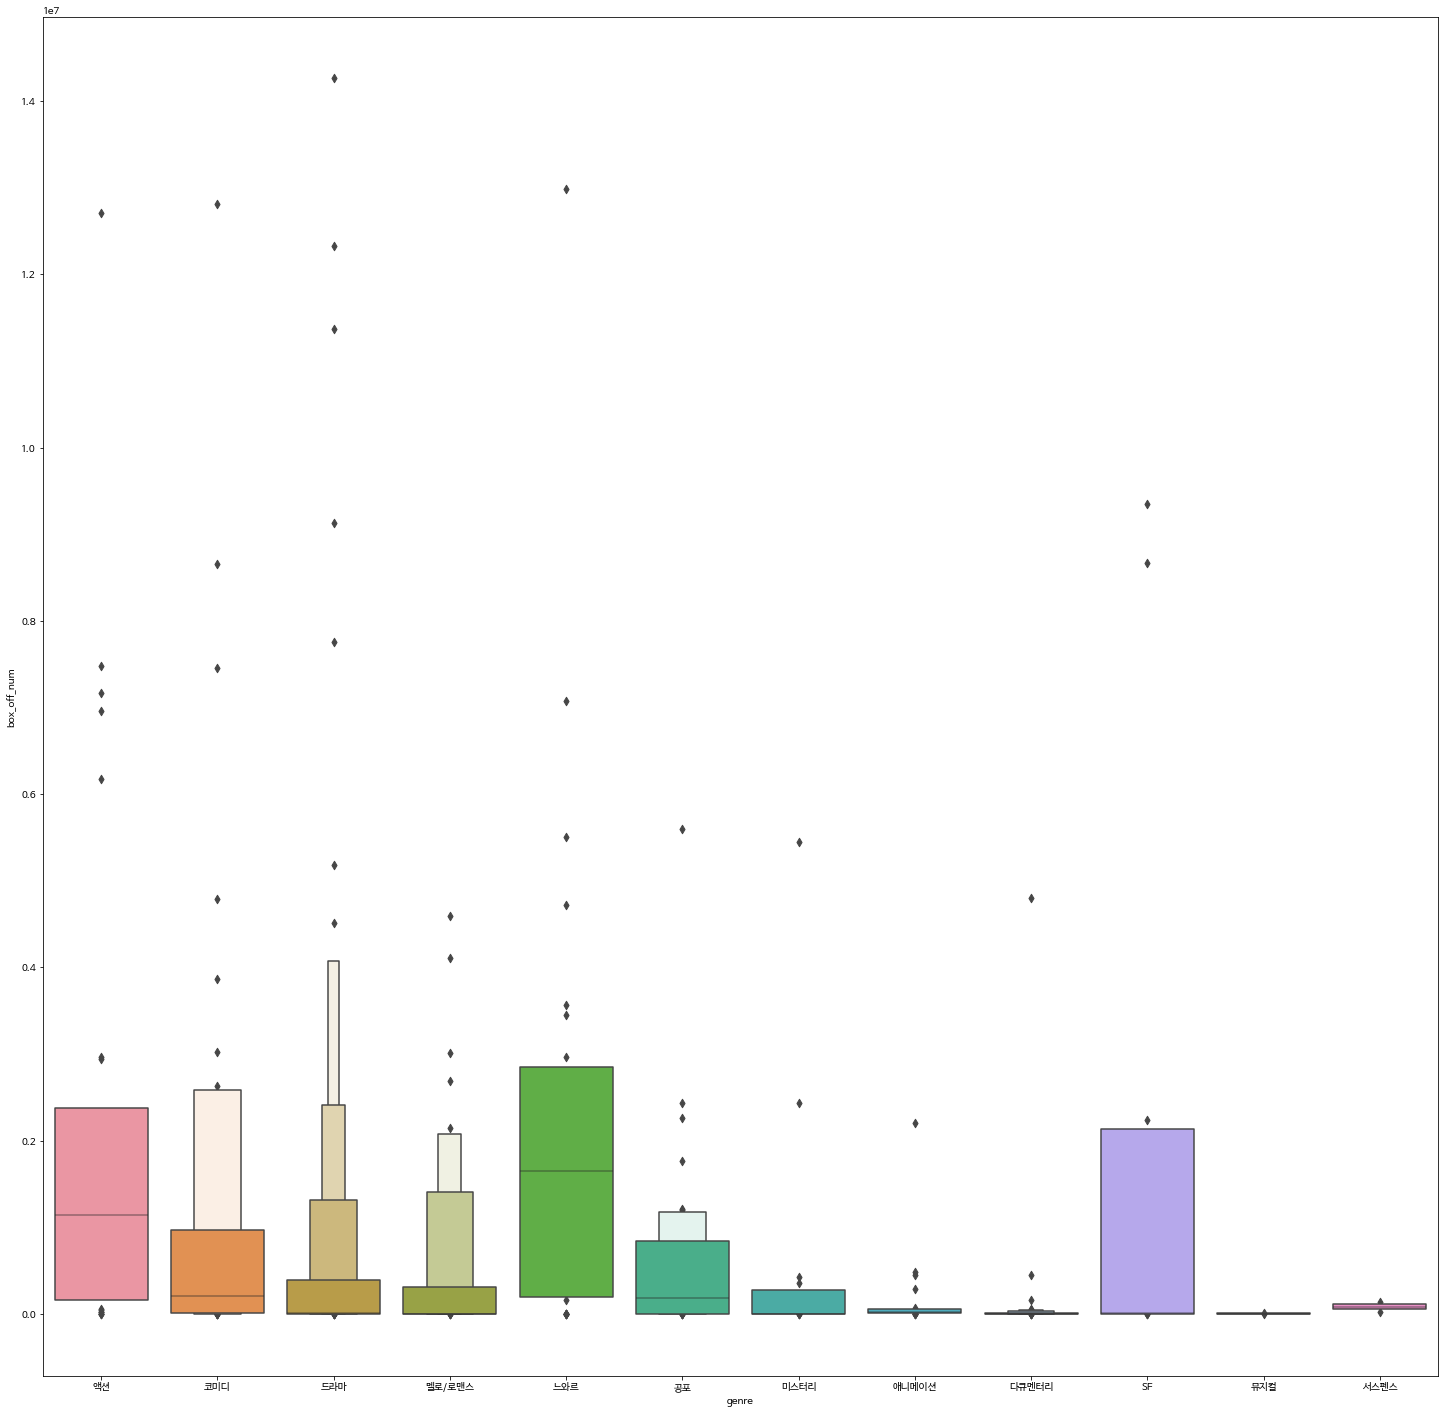

In [543]:
#장르 별 관객 수의 박스플랏
sns.boxenplot(x='genre', y='box_off_num', data=train)

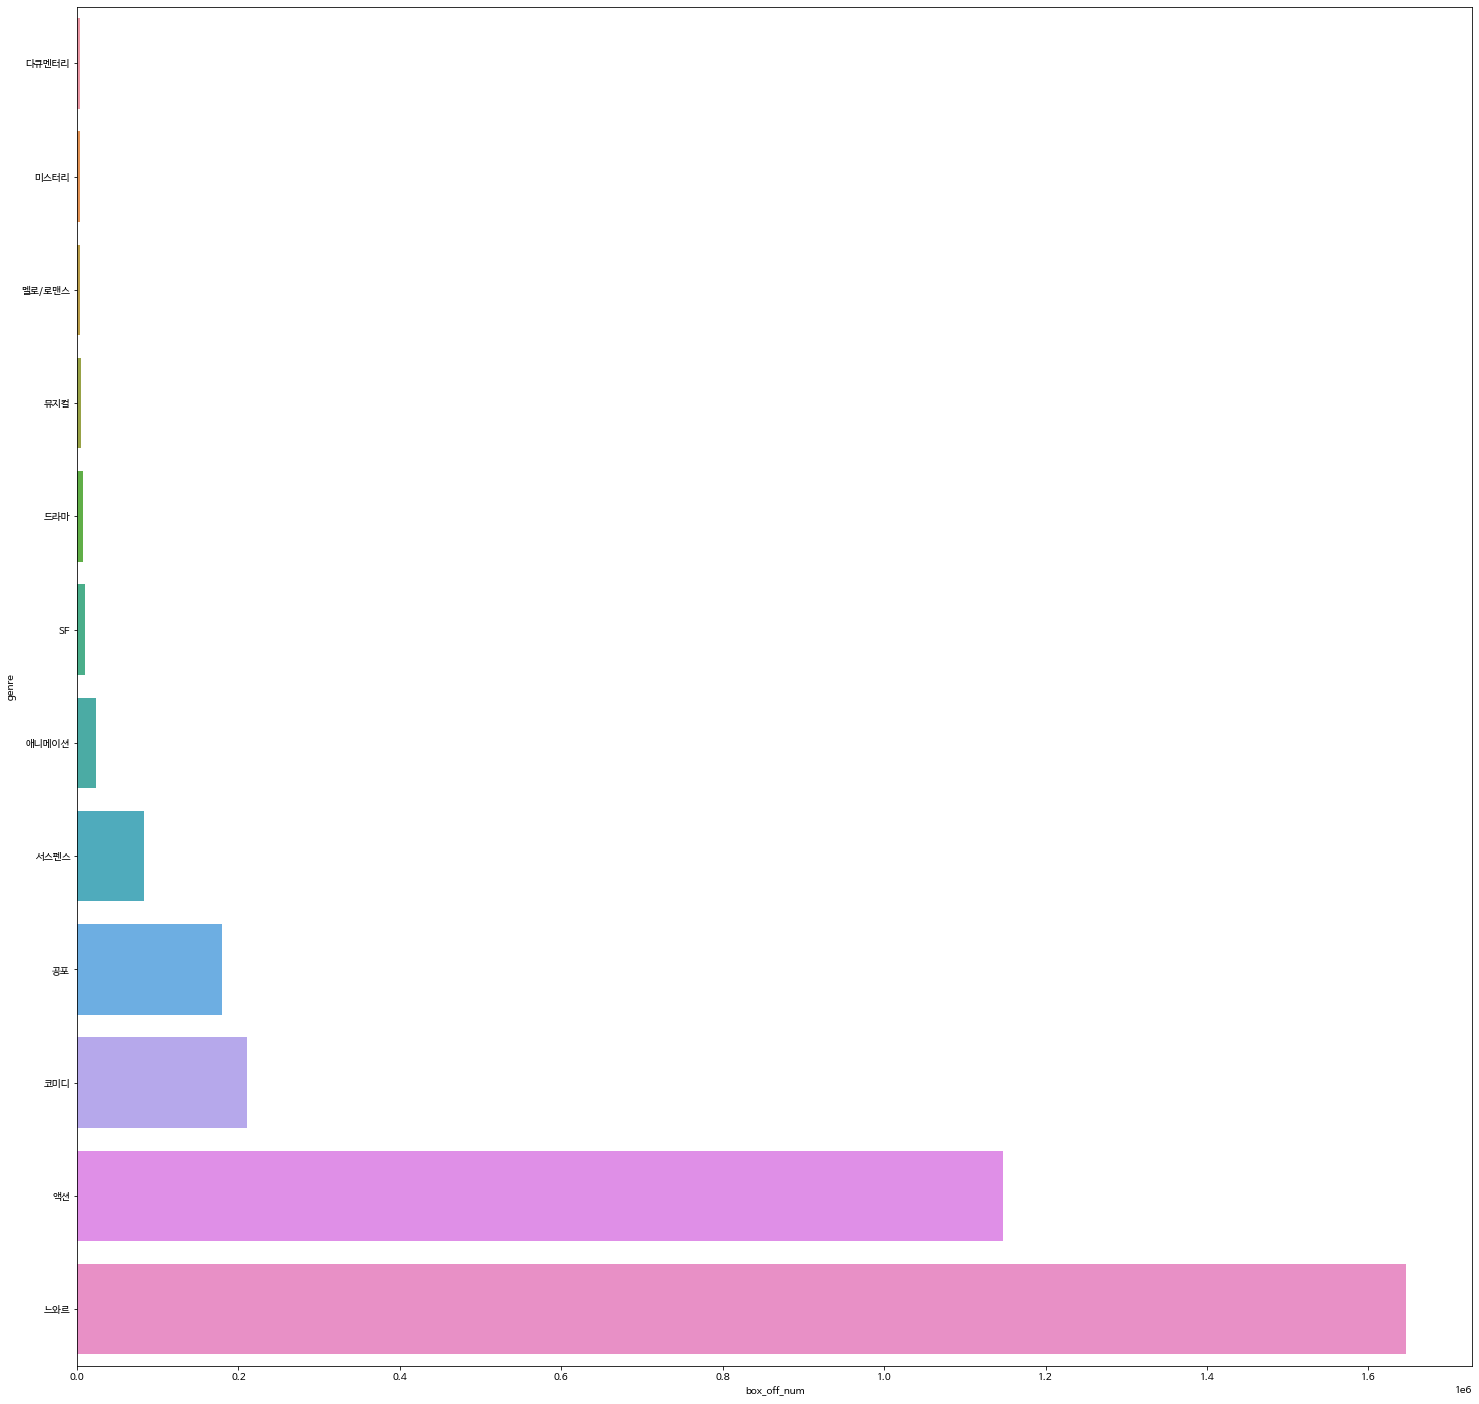

In [544]:
#장르별 관객수 중앙값으로 처리 *로그변환 X
df2_1=pd.DataFrame(train.groupby('genre').box_off_num.median().sort_values(ascending=True))
df2_1=df2_1.reset_index()
plt.rcParams['figure.figsize'] = [25,25] 
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='genre',data = df2_1)
#skewed 확인

In [545]:
df2_1

,genre,box_off_num
0,다큐멘터리,3044.0
1,미스터리,3199.0
2,멜로/로맨스,3653.0
3,뮤지컬,4778.0
4,드라마,7173.0
5,SF,9323.0
6,애니메이션,23802.0
7,서스펜스,82611.0
8,공포,179810.0
9,코미디,210775.0


In [546]:
df2_1 = df2_1.reset_index()
df2_1['genre_rank']=df2_1['index']+1
df2_1 = df2_1.drop('index', axis = 1)
df2_1 = df2_1.drop('box_off_num', axis = 1)

In [547]:
df2_1_OUTER_JOIN = pd.merge(train,df2_1, left_on='genre', right_on='genre', how='outer')
train = pd.DataFrame(df2_1_OUTER_JOIN)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dist_rank,genre_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,134,11
1,특수본,롯데엔터테인먼트,액션,2011-11-24,111,15세 관람가,황병국,NaN,0,253,6,1118258,134,11
2,최종병기 활,롯데엔터테인먼트,액션,2011-08-10,122,15세 관람가,김한민,2.079989e+06,1,687,4,7482180,134,11
3,서부전선,롯데엔터테인먼트,액션,2015-09-24,112,12세 관람가,천성일,4.385472e+06,2,388,2,609063,134,11
4,"협녀, 칼의 기억",롯데엔터테인먼트,액션,2015-08-13,121,15세 관람가,박흥식,1.209303e+05,3,439,3,431310,134,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,멋진 인생,영화사조제,뮤지컬,2011-06-09,100,12세 관람가,신춘수,NaN,0,4,4,3089,54,4
596,오디세오,패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862,37,4
597,모차르트 락 오페라,SK,뮤지컬,2011-11-17,133,전체 관람가,정성복,NaN,0,4,4,16323,137,4
598,짓,팝파트너스,서스펜스,2013-09-25,107,청소년 관람불가,한종훈,5.342325e+05,2,15,4,23052,107,8


In [548]:
df2_1

,genre,genre_rank
0,다큐멘터리,1
1,미스터리,2
2,멜로/로맨스,3
3,뮤지컬,4
4,드라마,5
5,SF,6
6,애니메이션,7
7,서스펜스,8
8,공포,9
9,코미디,10


In [549]:
#test data에는 box_off_num이 없음 -> 그냥 train data의 genre_rank를 test data에 새로운 열 dist_rank 추가함.
join2=pd.merge(test,df2_1,left_on='genre', right_on='genre', how='left')
test = pd.DataFrame(join2)
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,dist_rank,genre_rank
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,132.0,12
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,145.0,3
2,하모니,CJ,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,141.0,5
3,의형제,쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,145.0,11
4,평행 이론,CJ,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,141.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4,112.0,5
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,69.0,1
240,어떤살인,컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,0.0,12
241,말하지 못한 비밀,마운틴픽처스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7,46.0,5


In [550]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dist_rank           0
genre_rank          0
dtype: int64

In [551]:
#test['genre_rank'] = test.genre.map({'다큐멘터리':1,'미스터리':2,'멜로/로맨스':3,'뮤지컬':4,'드라마':5,'SF':6,'애니메이션':7,'서스펜스':8,'공포':9,'코미디':10,'액션':11,'느와르':12})

In [552]:
#test.isnull().sum()

#**새 변수 만드는데, 사용된 변수 삭제**
(distributor,genre,box_off_num *이건 train 데이터에서만 삭제)

In [553]:
train.drop(['distributor','genre','box_off_num'], axis=1, inplace=True) #위에 필기 반영
test.drop(['distributor','genre'], axis=1, inplace=True)


In [554]:
train.columns

Index(['title', 'release_time', 'time', 'screening_rat', 'director',
       'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'dist_rank',
       'genre_rank'],
      dtype='object')

In [555]:
test.columns

Index(['title', 'release_time', 'time', 'screening_rat', 'director',
       'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'dist_rank',
       'genre_rank'],
      dtype='object')